In [71]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy.optimize import curve_fit

La loi est $f(x) = e^{-x}$ pour $x \in [0, +\infty]$

In [5]:
argument = 200000 #taille tableau
tabx = np.random.uniform(0,1,argument)
taby = np.random.uniform(0,1,argument)

(array([1.00890491, 1.00830491, 0.98265478, 1.01880496, 1.01715495,
        1.01715495, 1.01925496, 1.00305488, 0.99390484, 0.99510484,
        1.01115492, 1.00335488, 1.01115492, 1.00320488, 0.99030482,
        0.98820481, 0.99915486, 0.99540484, 0.99885486, 0.9868548 ,
        0.98895481, 0.98925481, 1.00545489, 0.98040477, 0.98775481,
        0.99285483, 1.01055492, 0.98790481, 1.00485489, 1.00020487]),
 array([9.35662996e-07, 3.33341068e-02, 6.66672780e-02, 1.00000449e-01,
        1.33333620e-01, 1.66666791e-01, 1.99999963e-01, 2.33333134e-01,
        2.66666305e-01, 2.99999476e-01, 3.33332647e-01, 3.66665818e-01,
        3.99998990e-01, 4.33332161e-01, 4.66665332e-01, 4.99998503e-01,
        5.33331674e-01, 5.66664845e-01, 5.99998017e-01, 6.33331188e-01,
        6.66664359e-01, 6.99997530e-01, 7.33330701e-01, 7.66663872e-01,
        7.99997044e-01, 8.33330215e-01, 8.66663386e-01, 8.99996557e-01,
        9.33329728e-01, 9.66662899e-01, 9.99996071e-01]),
 <BarContainer object of 30 

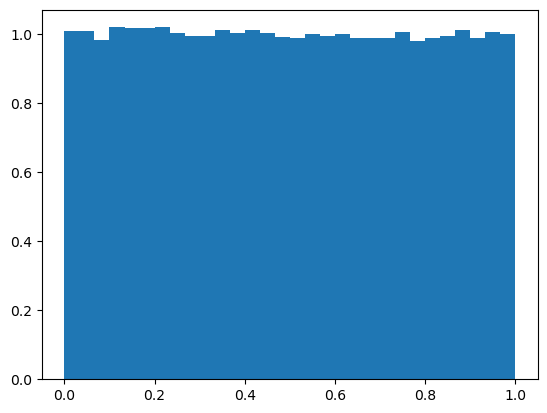

In [6]:
#plt.hist(tab, bins=100, density = True, stacked = True)

plt.hist(tabx,bins=30, density=1)

Text(0.5, 0, 'Valeur de x')

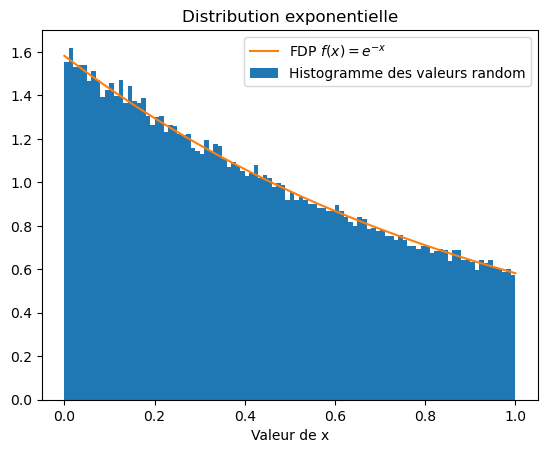

In [7]:
def f(x):
    return np.exp(-x)

tab_points_u = np.zeros((tabx.size,2))

tab_points_u[:,0]=tabx
tab_points_u[:,1]=taby



tab_points_exp = tab_points_u[ tab_points_u[:,1] < f(tab_points_u[:,0]) ]


plt.hist(tab_points_exp[:,0], bins=100, density=True)
plt.plot(np.linspace(0,1,1000),f(np.linspace(0,1,1000))/(-1/np.e + 1))
plt.legend(["FDP $f(x)=e^{-x}$","Histogramme des valeurs random"])
plt.title("Distribution exponentielle")
plt.xlabel("Valeur de x")

Text(0.5, 0, 'Valeur de x')

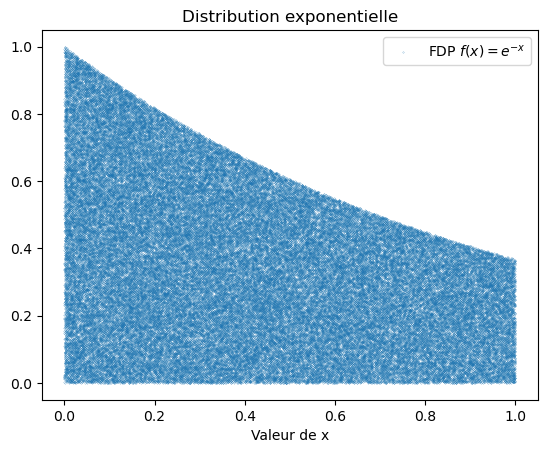

In [8]:
plt.scatter(tab_points_exp[:,0],tab_points_exp[:,1], marker = ".", s=0.1)

plt.legend(["FDP $f(x)=e^{-x}$","Histogramme des valeurs random"])
plt.title("Distribution exponentielle")
plt.xlabel("Valeur de x")

## Exo 12/02/2024

Notre PDF est $f(x) = e^{-x}$ donc $F(x) = 1 - e^{-x}$
On calcule $F^-1(y)=x \rightarrow F^-1(y) = -ln(1-y)$

In [9]:
def invf(y):
    x = -np.log(1-y)
    return x

In [10]:
N=20000
tab_y = np.random.uniform(0,1,N)

Text(0, 0.5, 'p')

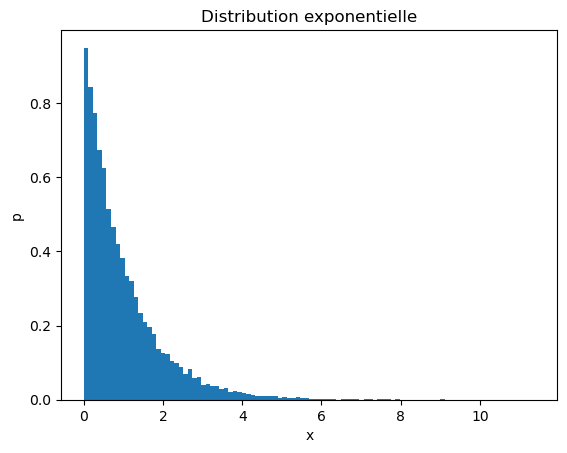

In [11]:
plt.hist(invf(tab_y),bins=100,density=True)
plt.title("Distribution exponentielle")
plt.xlabel("x")
plt.ylabel("p")

Text(0, 0.5, 'proba')

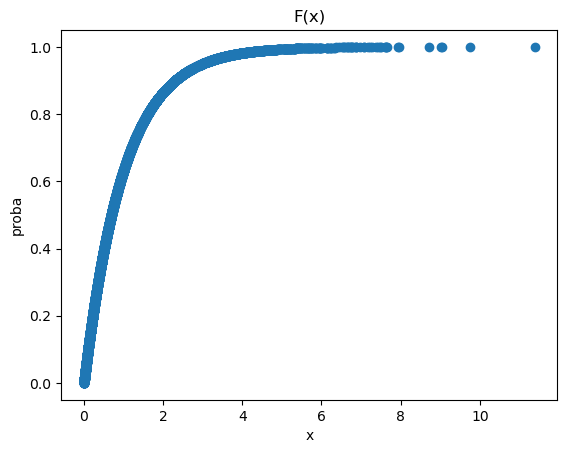

In [12]:
plt.scatter(invf(tab_y),tab_y)
plt.title("F(x)")
plt.xlabel("x")
plt.ylabel("proba")

In [13]:
x = np.linspace(0,10,10)

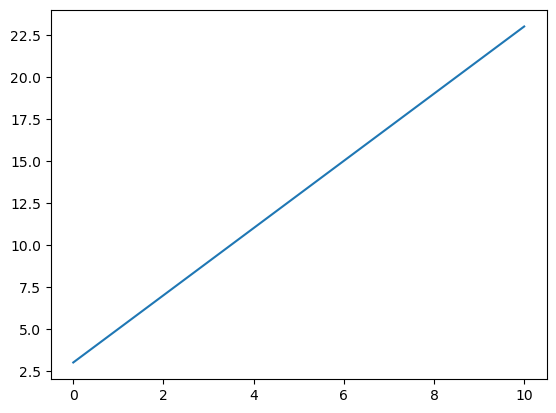

In [68]:
def Y(x,a,b):
    return a*x+b

ym = Y(x,2,3)
plt.plot(x,ym)


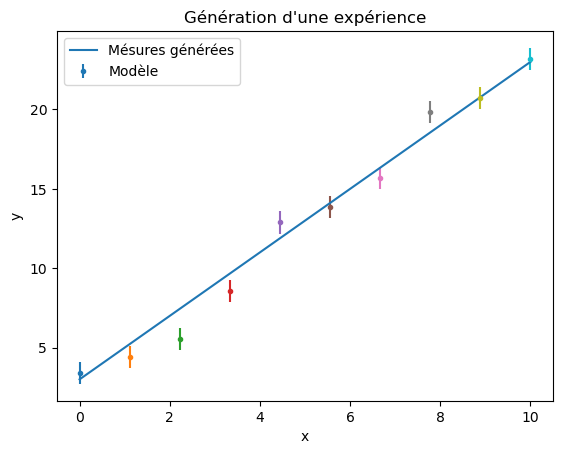

In [70]:
   
for i,y in enumerate(ym):
    yr = np.random.normal(loc=y,scale=0.7)
    plt.errorbar(x[i],yr,yerr=0.7,elinewidth=1.5,fmt=".")           #
ym = Y(x,2,3)
plt.plot(x,ym)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Génération d'une expérience")
plt.legend(["Mésures générées","Modèle"])

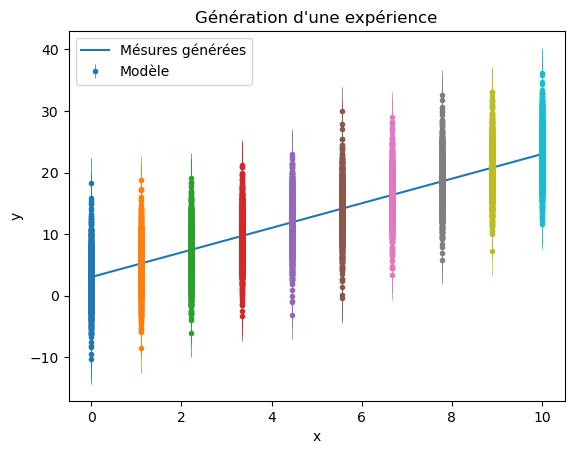

In [95]:
S=4 #sigma
for i,y in enumerate(ym):
    yr = np.random.normal(loc=y,scale=S,size=1000)
    plt.errorbar(x[i]*np.ones(yr.shape),yr,yerr=S,elinewidth=.5,fmt=".")           #
ym = Y(x,2,3)
plt.plot(x,ym)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Génération d'une expérience")
plt.legend(["Mésures générées","Modèle"])

In [99]:
A = []
B = []


for n in range(10000):
    yr = np.random.normal(loc=ym,scale=S)
    popt,_ = curve_fit(Y,x,yr,sigma=S*np.ones(yr.shape))
    
    A.append(popt[0])
    B.append(popt[1])

    

Text(0.5, 1.0, 'B')

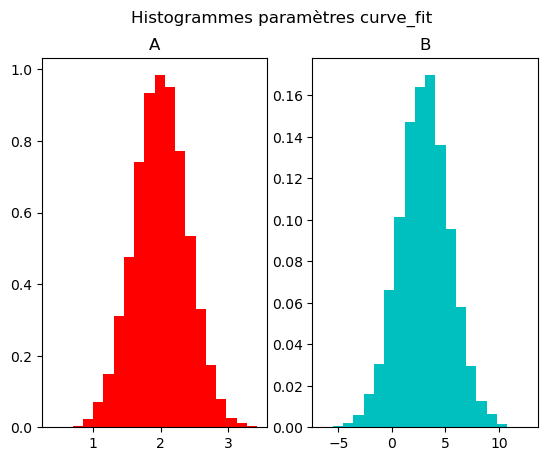

In [100]:
fig, axs = plt.subplots(1,2)
fig.suptitle('Histogrammes paramètres curve_fit')
axs[0].hist(A,bins=20,density=True,color="r")
axs[0].set_title("A")
axs[1].hist(B,bins=20,density=True,color="c")
axs[1].set_title("B")


(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   2.,   1.,   0.,   2.,   2.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   1.,   5.,   3.,  12.,   8.,   2.,   2.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
           4.,   5.,  17.,  26.,  29.,  22.,   4.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
          14.,  28.,  71.,  67.,  26.,  16.,   2.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,  16.,
          69., 105., 140.,  96.,  33.,   6.,   1.,   0.,   0.],
        [  0.,   0.,   0., 

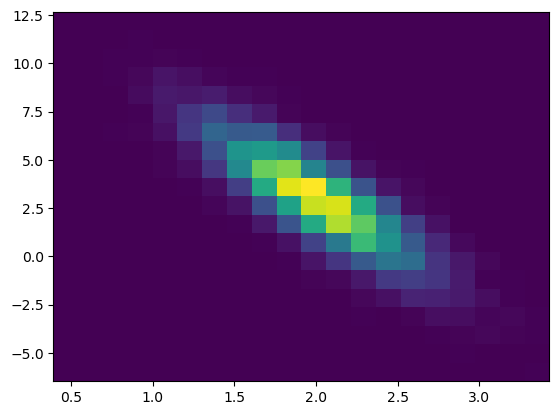

In [101]:
plt.hist2d(A,B,bins=20)

fit par ki2 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
https://stackoverflow.com/questions/39486270/scipy-optimize-minimize-chi-squared-python
